## COMP411/511  HW3
### Deadline: 22 December 2024, 23.59

You have **TODOs** in this code. They are all marked with `TODO` in comments.  
Your task is to fill them in with the correct code. Do **not** change any other code.  

You also have some questions to answer. They are marked with `QA` as markdown cells.  

---

## Parts:

### **1: Classification on CIFAR**
1.1: **Simple CNN** *(10 pts)*  
1.2: **Deeper CNN** *(10 pts)*  
1.3: **Regularized Deeper CNN** *(10 pts)*  
1.4: **QA** *(5 pts)*  

---

### **2: Semantic Segmentation on Pascal VOC**
2.1.1: **Preprocess Pascal VOC** *(5 pts)*  
2.1.2: **QA** *(5 pts)*  
2.2: **Pretrained FCN** *(20 pts)*  
2.3: **QA** *(15 pts)*  
2.4: **Training the FCN** *(20 pts)*  

---

### **Total: 100 points**

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import sampler

import torchvision.datasets as dset
import torchvision.transforms as T

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
try:
    from google.colab import drive
    drive.mount("/content/drive/", force_remount=True)
    google_drive_prefix = "/content/drive/My Drive"
    data_prefix = "{}/datasets/".format(google_drive_prefix)
except ModuleNotFoundError:
    data_prefix = "data/"

In [2]:
data_prefix = './datasets'

## Part 1: Classification on CIFAR

In [ ]:
NUM_TRAIN = 49000
transform = T.Compose([T.ToTensor(), T.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

cifar10_train = dset.CIFAR10(data_prefix, train=True, download=True, transform=transform)
loader_train = DataLoader(cifar10_train, batch_size=64, sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN)))

cifar10_val = dset.CIFAR10(data_prefix, train=True, download=True, transform=transform)
loader_val = DataLoader(cifar10_val, batch_size=64, sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN, 50000)))

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
def check_accuracy_and_loss(loader, model, device):
    acc = 0
    total_loss = 0
    model.eval()
    num_correct = 0
    num_samples = 0
    total_loss = 0
    criterion = nn.CrossEntropyLoss()
    with torch.no_grad():
        for x, y in loader:
            x = x.to(device)
            y = y.to(device)

            scores = model(x)
            loss = criterion(scores, y)
            total_loss += loss
            _, preds = scores.max(1)
            num_correct += (preds == y).sum()
            num_samples += preds.size(0)
    acc = num_correct / num_samples
    total_loss /= len(loader)
    return acc, total_loss

### Part 1.1: Simple CNN (10 pts)

In [ ]:
# TODO: Define a simple CNN with the following architecture:
#
# Conv(kernel=(3, 3), stride=1, padding=1, input_channel=3, output_channel=32)
# ReLU
# MaxPool(kernel=2, stride=2)
# Conv(kernel=(3, 3), stride=1, padding=1, input_channel=32, output_channel=64)
# ReLU
# MaxPool(kernel=2, stride=2)
# Flatten
# Linear(input=64*8*8, output=10)

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        # === TODO ===
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.linear = nn.Linear(64*8*8, 10)
        # === === ===

    def forward(self, x):
        # === TODO ===
        x = self.conv1(x)
        x = nn.functional.relu(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = nn.functional.relu(x)
        x = self.pool2(x)

        x = x.view(x.size(0), -1)
        x = self.linear(x)

        # === === ===
        return x

Epoch 1/10


Training Epoch 1: 100%|██████████| 766/766 [00:20<00:00, 37.86it/s, Batch Loss=1.29]


Epoch 1 - Train Loss: 1.0859, Train Acc: 62.30%, Val Loss: 1.1032, Val Acc: 60.50%
Epoch 2/10


Training Epoch 2: 100%|██████████| 766/766 [00:19<00:00, 39.63it/s, Batch Loss=1.32]


Epoch 2 - Train Loss: 0.8881, Train Acc: 69.65%, Val Loss: 0.9659, Val Acc: 67.00%
Epoch 3/10


Training Epoch 3: 100%|██████████| 766/766 [00:19<00:00, 38.99it/s, Batch Loss=1.2]


Epoch 3 - Train Loss: 0.7681, Train Acc: 73.63%, Val Loss: 0.8945, Val Acc: 70.20%
Epoch 4/10


Training Epoch 4: 100%|██████████| 766/766 [00:19<00:00, 39.19it/s, Batch Loss=0.737]


Epoch 4 - Train Loss: 0.7273, Train Acc: 74.91%, Val Loss: 0.9010, Val Acc: 67.90%
Epoch 5/10


Training Epoch 5: 100%|██████████| 766/766 [00:21<00:00, 35.55it/s, Batch Loss=0.761]


Epoch 5 - Train Loss: 0.6711, Train Acc: 77.07%, Val Loss: 0.8695, Val Acc: 70.60%
Epoch 6/10


Training Epoch 6: 100%|██████████| 766/766 [00:21<00:00, 35.89it/s, Batch Loss=0.732]


Epoch 6 - Train Loss: 0.6381, Train Acc: 78.10%, Val Loss: 0.8679, Val Acc: 72.10%
Epoch 7/10


Training Epoch 7: 100%|██████████| 766/766 [00:22<00:00, 34.47it/s, Batch Loss=0.612]


Epoch 7 - Train Loss: 0.5877, Train Acc: 79.90%, Val Loss: 0.9139, Val Acc: 69.60%
Epoch 8/10


Training Epoch 8: 100%|██████████| 766/766 [00:19<00:00, 38.65it/s, Batch Loss=0.436]


Epoch 8 - Train Loss: 0.5414, Train Acc: 81.44%, Val Loss: 0.8754, Val Acc: 69.70%
Epoch 9/10


Training Epoch 9: 100%|██████████| 766/766 [00:19<00:00, 40.17it/s, Batch Loss=0.593]


Epoch 9 - Train Loss: 0.4983, Train Acc: 83.23%, Val Loss: 0.8632, Val Acc: 73.10%
Epoch 10/10


Training Epoch 10: 100%|██████████| 766/766 [00:20<00:00, 38.12it/s, Batch Loss=0.407]


Epoch 10 - Train Loss: 0.4699, Train Acc: 83.83%, Val Loss: 0.8860, Val Acc: 71.90%


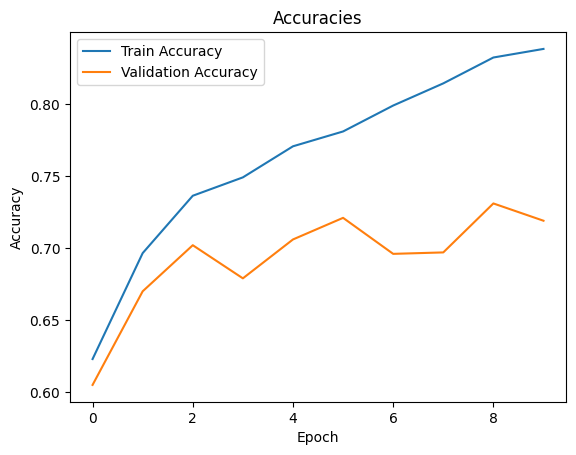

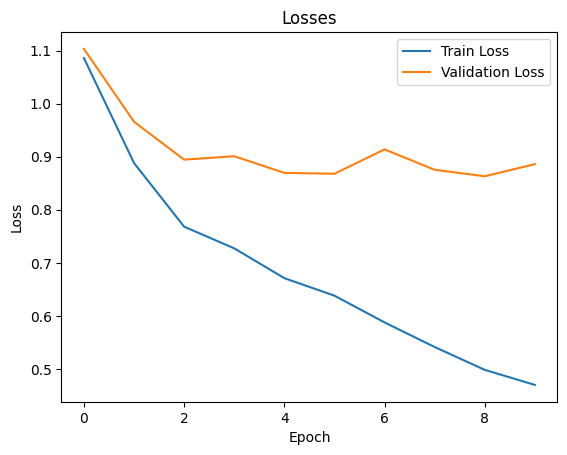

In [ ]:
# TODO: Train the model with
#           Adam optimizer
#           Learning rate of 1e-3
#           Batch size of 64
#           10 epochs
#           Cross Entropy Loss
# Check train loss and train accuracy after each epoch, and validate accuracy after each epoch
# Store them, and plot them at the end
# Moreover, store losses and plot them at the end
# You should be easily able to achieve >65% accuracy on the validation set

from tqdm import tqdm  # Import tqdm for progress bars

lr = 1e-3
epochs = 10

model = SimpleCNN().to(DEVICE)
optimizer = optim.Adam(model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()

train_accs = []
val_accs = []
train_losses = []
val_losses = []

for epoch in range(epochs):
    print(f"Epoch {epoch + 1}/{epochs}")
    epoch_loss = 0  # Accumulate loss for display
    epoch_steps = 0  # Count steps for loss averaging

    # Progress bar for training batches
    with tqdm(total=len(loader_train), desc=f"Training Epoch {epoch + 1}") as pbar:
        for x, y in loader_train:
            x = x.to(DEVICE)
            y = y.to(DEVICE)

            scores = model(x)
            loss = criterion(scores, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Update progress
            epoch_loss += loss.item()
            epoch_steps += 1
            pbar.set_postfix({"Batch Loss": loss.item()})
            pbar.update(1)

    train_acc, train_loss = check_accuracy_and_loss(loader_train, model, device=DEVICE)
    val_acc, val_loss = check_accuracy_and_loss(loader_val, model, device=DEVICE)
    train_accs.append(train_acc)
    val_accs.append(val_acc)

    train_losses.append(train_loss)
    val_losses.append(val_loss)

    print(f"Epoch {epoch + 1} - Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2%}, "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2%}")

plt.plot([i.cpu() for i in train_accs], label='Train Accuracy')
plt.plot([i.cpu() for i in val_accs], label='Validation Accuracy')
plt.title('Accuracies')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot([i.cpu() for i in train_losses], label='Train Loss')
plt.plot([i.cpu() for i in val_losses], label='Validation Loss')
plt.title('Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


### Part 1.2: Deeper CNN (10 pts)

In [ ]:
# TODO: Now, implement a deeper CNN with the following architecture:
#
# Conv(kernel=(3, 3), stride=1, padding=1, input_channel=3, output_channel=32)
# ReLU
# Conv(kernel=(3, 3), stride=1, padding=1, input_channel=32, output_channel=32)
# ReLU
# MaxPool(kernel=2, stride=2)
# Conv(kernel=(3, 3), stride=1, padding=1, input_channel=32, output_channel=64)
# ReLU
# Conv(kernel=(3, 3), stride=1, padding=1, input_channel=64, output_channel=64)
# ReLU
# MaxPool(kernel=2, stride=2)
# Flatten
# Linear(input=64*8*8, output=128)


class DeepCNN(nn.Module):
    def __init__(self):
        super(DeepCNN, self).__init__()
        # === TODO ===
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)

        self.conv2 = nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)

        self.conv4 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.linear = nn.Linear(64*8*8, 128)
        # === === ===

    def forward(self, x):
        # === TODO ===
        x = self.conv1(x)
        x = nn.functional.relu(x)

        x = self.conv2(x)
        x = nn.functional.relu(x)
        x = self.pool2(x)

        x = self.conv3(x)
        x = nn.functional.relu(x)

        x = self.conv4(x)
        x = nn.functional.relu(x)
        x = self.pool4(x)

        x = x.view(x.size(0), -1)
        x = self.linear(x)
        # === === ===
        return x



Epoch 1/10


Training Epoch 1: 100%|██████████| 766/766 [00:23<00:00, 32.36it/s, Batch Loss=0.946]


Epoch 1 - Train Loss: 1.1415, Train Acc: 59.99%, Val Loss: 1.2013, Val Acc: 57.70%
Epoch 2/10


Training Epoch 2: 100%|██████████| 766/766 [00:24<00:00, 31.26it/s, Batch Loss=0.801]


Epoch 2 - Train Loss: 0.8164, Train Acc: 71.76%, Val Loss: 0.9003, Val Acc: 67.90%
Epoch 3/10


Training Epoch 3: 100%|██████████| 766/766 [00:23<00:00, 33.10it/s, Batch Loss=0.586]


Epoch 3 - Train Loss: 0.6852, Train Acc: 76.21%, Val Loss: 0.7872, Val Acc: 73.10%
Epoch 4/10


Training Epoch 4: 100%|██████████| 766/766 [00:23<00:00, 32.19it/s, Batch Loss=0.376]


Epoch 4 - Train Loss: 0.5661, Train Acc: 80.51%, Val Loss: 0.7255, Val Acc: 75.90%
Epoch 5/10


Training Epoch 5: 100%|██████████| 766/766 [00:23<00:00, 32.41it/s, Batch Loss=0.657]


Epoch 5 - Train Loss: 0.5290, Train Acc: 81.57%, Val Loss: 0.7402, Val Acc: 74.70%
Epoch 6/10


Training Epoch 6: 100%|██████████| 766/766 [00:22<00:00, 33.64it/s, Batch Loss=0.463]


Epoch 6 - Train Loss: 0.4406, Train Acc: 84.86%, Val Loss: 0.7241, Val Acc: 77.20%
Epoch 7/10


Training Epoch 7: 100%|██████████| 766/766 [00:23<00:00, 32.47it/s, Batch Loss=0.431]


Epoch 7 - Train Loss: 0.3755, Train Acc: 87.32%, Val Loss: 0.7513, Val Acc: 76.20%
Epoch 8/10


Training Epoch 8: 100%|██████████| 766/766 [00:23<00:00, 32.23it/s, Batch Loss=0.604]


Epoch 8 - Train Loss: 0.3569, Train Acc: 87.73%, Val Loss: 0.7964, Val Acc: 75.60%
Epoch 9/10


Training Epoch 9: 100%|██████████| 766/766 [00:23<00:00, 32.94it/s, Batch Loss=0.492]


Epoch 9 - Train Loss: 0.2851, Train Acc: 90.46%, Val Loss: 0.7827, Val Acc: 75.70%
Epoch 10/10


Training Epoch 10: 100%|██████████| 766/766 [00:22<00:00, 33.47it/s, Batch Loss=0.253]


Epoch 10 - Train Loss: 0.2336, Train Acc: 92.34%, Val Loss: 0.8416, Val Acc: 74.70%


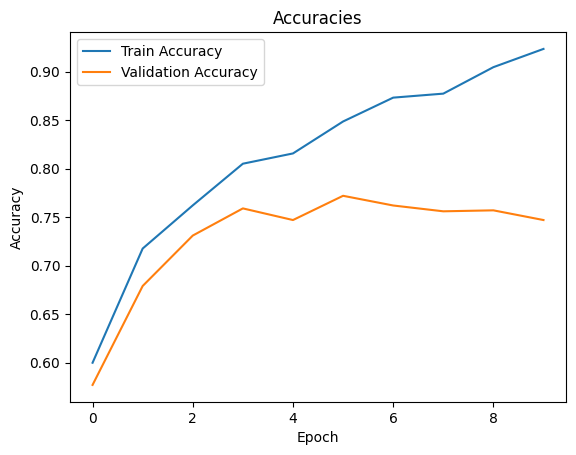

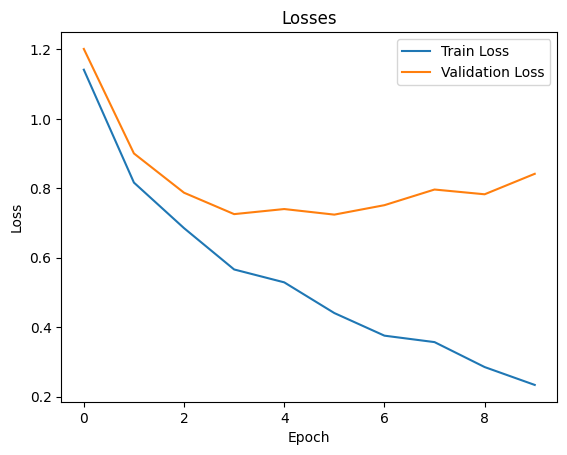

In [ ]:
# Train the model with the same configuration as before
# You should be easily able to achieve >70% accuracy on the validation set

from tqdm import tqdm  # Import tqdm for progress bars

lr = 1e-3
epochs = 10

model = DeepCNN().to(DEVICE)
optimizer = optim.Adam(model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()

train_accs = []
val_accs = []
train_losses = []
val_losses = []

for epoch in range(epochs):
    print(f"Epoch {epoch + 1}/{epochs}")
    epoch_loss = 0  # Accumulate loss for display
    epoch_steps = 0  # Count steps for loss averaging

    # Progress bar for training batches
    with tqdm(total=len(loader_train), desc=f"Training Epoch {epoch + 1}") as pbar:
        for x, y in loader_train:
            x = x.to(DEVICE)
            y = y.to(DEVICE)

            scores = model(x)
            loss = criterion(scores, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Update progress
            epoch_loss += loss.item()
            epoch_steps += 1
            pbar.set_postfix({"Batch Loss": loss.item()})
            pbar.update(1)

    train_acc, train_loss = check_accuracy_and_loss(loader_train, model, device=DEVICE)
    val_acc, val_loss = check_accuracy_and_loss(loader_val, model, device=DEVICE)
    train_accs.append(train_acc)
    val_accs.append(val_acc)

    train_losses.append(train_loss)
    val_losses.append(val_loss)

    print(f"Epoch {epoch + 1} - Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2%}, "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2%}")

plt.plot([i.cpu() for i in train_accs], label='Train Accuracy')
plt.plot([i.cpu() for i in val_accs], label='Validation Accuracy')
plt.title('Accuracies')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot([i.cpu() for i in train_losses], label='Train Loss')
plt.plot([i.cpu() for i in val_losses], label='Validation Loss')
plt.title('Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


### Part 1.3: Regularized Deeper CNN (10 pts)

In [ ]:
import models

In [ ]:
a = models.resnet18(pretrained=False)
print(a)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [ ]:
# TODO: We observe an overfitting in the training and validation losses. The training loss is decreasing while the validation loss is increasing. This is a clear sign of overfitting.
#       In this part, your task is to solve this problem by adding dropout layers and batch normalization layers to each layer of the model.
#       You should add dropout and batch normalization layers to proper places (https://jmlr.org/papers/v15/srivastava14a.html)


class RegDeepCNN(nn.Module):
    def __init__(self):
        super(RegDeepCNN, self).__init__()
        # === TODO ===
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1)
        self.conv1_bn = nn.BatchNorm2d(32)

        self.conv2 = nn.Conv2d(32, 32, kernel_size=3, stride=1, padding=1)
        self.conv2_bn = nn.BatchNorm2d(32)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.conv3_bn = nn.BatchNorm2d(64)

        self.conv4 = nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1)
        self.conv4_bn = nn.BatchNorm2d(64)
        self.pool4 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.linear = nn.Linear(64*8*8, 128)
        # === === ===

    def forward(self, x):
        # === TODO ===
        x = self.conv1(x)
        x = self.conv1_bn(x)
        x = nn.functional.relu(x)

        x = self.conv2(x)
        x = self.conv2_bn(x)
        x = nn.functional.relu(x)
        x = self.pool2(x)

        x = self.conv3(x)
        x = self.conv3_bn(x)
        x = nn.functional.relu(x)

        x = self.conv4(x)
        x = self.conv4_bn(x)
        x = nn.functional.relu(x)
        x = self.pool4(x)

        x = nn.functional.dropout(x, p=0.5)

        x = x.view(x.size(0), -1)
        x = self.linear(x)
        # === === ===
        return x


Epoch 1/10


Training Epoch 1: 100%|██████████| 766/766 [00:24<00:00, 30.94it/s, Batch Loss=0.971]


Epoch 1 - Train Loss: 1.0144, Train Acc: 64.14%, Val Loss: 1.0555, Val Acc: 63.00%
Epoch 2/10


Training Epoch 2: 100%|██████████| 766/766 [00:25<00:00, 29.70it/s, Batch Loss=0.766]


Epoch 2 - Train Loss: 0.8187, Train Acc: 71.05%, Val Loss: 0.8982, Val Acc: 68.50%
Epoch 3/10


Training Epoch 3: 100%|██████████| 766/766 [00:25<00:00, 29.49it/s, Batch Loss=0.884]


Epoch 3 - Train Loss: 0.7423, Train Acc: 74.02%, Val Loss: 0.8123, Val Acc: 71.40%
Epoch 4/10


Training Epoch 4: 100%|██████████| 766/766 [00:23<00:00, 32.60it/s, Batch Loss=0.737]


Epoch 4 - Train Loss: 0.7107, Train Acc: 75.30%, Val Loss: 0.8205, Val Acc: 72.60%
Epoch 5/10


Training Epoch 5: 100%|██████████| 766/766 [00:23<00:00, 32.56it/s, Batch Loss=0.809]


Epoch 5 - Train Loss: 0.6362, Train Acc: 77.80%, Val Loss: 0.8031, Val Acc: 72.50%
Epoch 6/10


Training Epoch 6: 100%|██████████| 766/766 [00:25<00:00, 29.65it/s, Batch Loss=0.609]


Epoch 6 - Train Loss: 0.6126, Train Acc: 78.61%, Val Loss: 0.7626, Val Acc: 75.10%
Epoch 7/10


Training Epoch 7: 100%|██████████| 766/766 [00:23<00:00, 32.28it/s, Batch Loss=0.51]


Epoch 7 - Train Loss: 0.5633, Train Acc: 80.28%, Val Loss: 0.7354, Val Acc: 75.60%
Epoch 8/10


Training Epoch 8: 100%|██████████| 766/766 [00:23<00:00, 32.36it/s, Batch Loss=0.819]


Epoch 8 - Train Loss: 0.5313, Train Acc: 81.36%, Val Loss: 0.7372, Val Acc: 76.40%
Epoch 9/10


Training Epoch 9: 100%|██████████| 766/766 [00:23<00:00, 32.83it/s, Batch Loss=0.706]


Epoch 9 - Train Loss: 0.5081, Train Acc: 82.12%, Val Loss: 0.7446, Val Acc: 76.70%
Epoch 10/10


Training Epoch 10: 100%|██████████| 766/766 [00:24<00:00, 31.27it/s, Batch Loss=0.381]


Epoch 10 - Train Loss: 0.4744, Train Acc: 83.34%, Val Loss: 0.7299, Val Acc: 76.40%


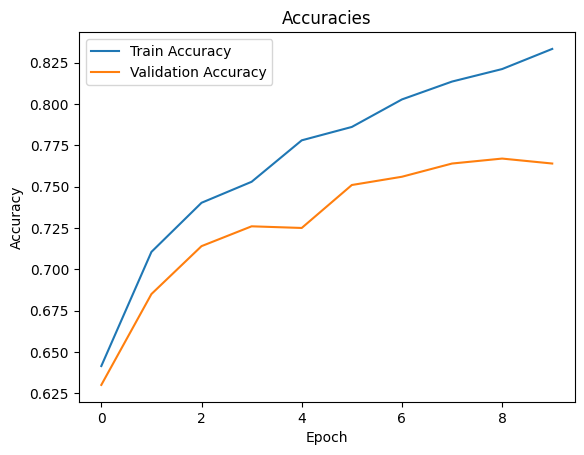

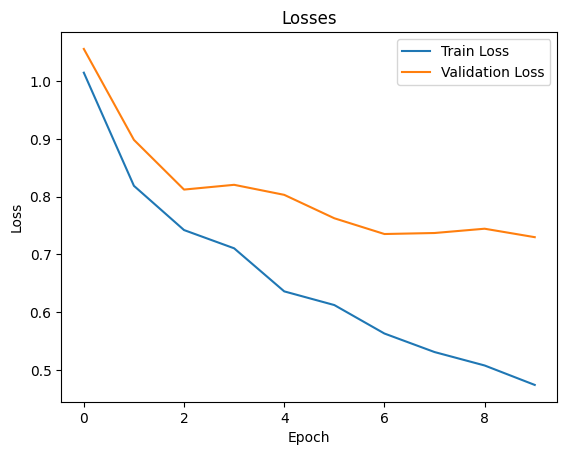

In [ ]:
# Train the model with the same configuration as before

from tqdm import tqdm  # Import tqdm for progress bars

lr = 1e-3
epochs = 10

model = RegDeepCNN().to(DEVICE)
optimizer = optim.Adam(model.parameters(), lr=lr)
criterion = nn.CrossEntropyLoss()

train_accs = []
val_accs = []
train_losses = []
val_losses = []

for epoch in range(epochs):
    print(f"Epoch {epoch + 1}/{epochs}")
    epoch_loss = 0  # Accumulate loss for display
    epoch_steps = 0  # Count steps for loss averaging

    # Progress bar for training batches
    with tqdm(total=len(loader_train), desc=f"Training Epoch {epoch + 1}") as pbar:
        for x, y in loader_train:
            x = x.to(DEVICE)
            y = y.to(DEVICE)

            scores = model(x)
            loss = criterion(scores, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Update progress
            epoch_loss += loss.item()
            epoch_steps += 1
            pbar.set_postfix({"Batch Loss": loss.item()})
            pbar.update(1)

    train_acc, train_loss = check_accuracy_and_loss(loader_train, model, device=DEVICE)
    val_acc, val_loss = check_accuracy_and_loss(loader_val, model, device=DEVICE)
    train_accs.append(train_acc)
    val_accs.append(val_acc)

    train_losses.append(train_loss)
    val_losses.append(val_loss)

    print(f"Epoch {epoch + 1} - Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2%}, "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2%}")

plt.plot([i.cpu() for i in train_accs], label='Train Accuracy')
plt.plot([i.cpu() for i in val_accs], label='Validation Accuracy')
plt.title('Accuracies')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot([i.cpu() for i in train_losses], label='Train Loss')
plt.plot([i.cpu() for i in val_losses], label='Validation Loss')
plt.title('Losses')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



### Part 1.4: QA (5 pts)

Q1: Dit it solve overfitting? Explain why or why not. (3 pts)

A: Yes, it improved generalization of the model as can be seen from the loss plot. Because the dropout ensures that the model does not rely on few neurons too much and it forces the network to rely on a wider range of features and reduces chances of overfitting to training data. Batch normalization reduces overfitting by normalizing the activations in hidden layers, so the model learns to differentiate from normally distributed input, independent from training/test data. It also adds noise which helps with generalization.

---

Q2: What else can you do to solve overfitting?

Hint: One option could be a different kind of optimizer, check PyTorch documentation (2 pts)

A: An option is early stopping, we can stop the training when validation loss starts to increase. We can use data augmentation to prepare the model to diverse and distorted input. In the optimizer, we can choose to employ weight decay, which penalizes large weights and forces the model to learn a wider representation.

## Part 2: Semantic Segmentation on Pascal VOC

In [3]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import sampler
import torchvision.transforms as T
import torchvision.transforms.functional as TF
from torchvision.datasets import VOCSegmentation
from torch.utils.data import DataLoader
from PIL import Image

### Part 2.1.1: Preprocess Pascal VOC (5 pts)

In [55]:
# TODO: Define transformations for both image and mask
# Resize the image to 256x256 with interpolation mode with proper kind of interpolation
# Resize the mask to 256x256 with interpolation mode with proper kind of interpolation
# Convert the image to tensor
# Convert the mask to tensor

class SegmentationTransform:
    def __init__(self, size=(256, 256)):
        # === TODO ===
        self.image_transform = T.Compose([
            T.Resize(size),  # Resize with bilinear interpolation
            T.ToTensor(),  # Convert the image to a tensor
            T.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
        ])
        # === === ===

        # === TODO ===

        self.mask_transform = T.Compose([
            T.Resize(size, interpolation=T.InterpolationMode.NEAREST),  # Resize with nearest neighbor interpolation
            T.PILToTensor(),  # Convert the mask to a tensor
            T.Lambda(lambda x: torch.where(x == 255, torch.tensor(0, dtype=x.dtype), x))
        ])

        # === === ===

    def __call__(self, img, mask):

        img = self.image_transform(img)
        mask = self.mask_transform(mask).squeeze()  # Remove channel dim
        return img, mask

# Dataset with consistent transforms
transform = SegmentationTransform()

# Load Pascal VOC dataset
train_dataset = VOCSegmentation(
    root=data_prefix,
    year='2012',
    image_set='train',
    download=True,
    transforms=transform
)

val_dataset = VOCSegmentation(
    root=data_prefix,
    year='2012',
    image_set='val',
    download=True,
    transforms=transform
)

voc_classes = ['background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike', 'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor']

#assert len(train_dataset) == 1464
#assert len(val_dataset) == 1449
#assert train_dataset[0][0].shape == (3, 256, 256)
#assert train_dataset[0][1].shape == (256, 256)
print(train_dataset[0][1].shape )


Using downloaded and verified file: ./datasets/VOCtrainval_11-May-2012.tar
Extracting ./datasets/VOCtrainval_11-May-2012.tar to ./datasets
Using downloaded and verified file: ./datasets/VOCtrainval_11-May-2012.tar
Extracting ./datasets/VOCtrainval_11-May-2012.tar to ./datasets
torch.Size([256, 256])


### Part 2.1.2: QA (5 pts)

 Q: Which interpolation did you prefer for image and mask resizing? Can you use bilinear interpolation for masks?

 A: For image resizing, I used bilinear interpolation, and for mask resizing I used nearest neighbor interpolation. Bilinear interpolation cannot be used for mask resizing because it would result in scalar values with decimal places, which is not suitable for masks containing categorical class data.



### Part 2.2: Pretrained FCN (20 pts)

In [57]:
# TODO: Segmentation can be considered as a pixel-wise classification problem.
#       Fully Convolutional Network (https://arxiv.org/pdf/1411.4038) is a popular architecture for semantic segmentation, classifying each pixel in an image, to a class.
#       In this part, you are going to use pretrained Fully Convolutional Network (FCN) for semantic segmentation.
#       You can use the torchvision.models.segmentation.fcn_resnet50 model for this task, which is a FCN model with a ResNet-50 backbone.
#       You should use the pretrained weights of the model.
#       IMPORTANT: Tthe output of the model is a dictionary with key 'out' which contains the output of the model.
#
#       You should also implement the compute_mIoU function that computes the mIoU for a given model and dataloader.
#
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


model = torchvision.models.segmentation.fcn_resnet50(pretrained=True).requires_grad_(False).to(DEVICE)

# 10 pts
def compute_mIoU(model, dataloader, num_classes=21):
    # === TODO ===
    model.eval()  # Set the model to evaluation mode
    intersection = torch.zeros(num_classes).to(DEVICE)
    union = torch.zeros(num_classes).to(DEVICE)

    with torch.no_grad():  # No need to compute gradients during evaluation
        for images, targets in dataloader:
            images = images.to(DEVICE)
            targets = targets.to(DEVICE)

            # Get the model predictions (this returns a dict with key 'out')
            outputs = model(images)['out']

            # Get the predicted class for each pixel (highest probability class)
            preds = torch.argmax(outputs, dim=1)

            # Compute intersection and union for each class
            for c in range(num_classes):
                # Create masks for the intersection and union for class c
                intersection[c] += torch.sum((preds == c) & (targets == c)).float()
                union[c] += torch.sum((preds == c) | (targets == c)).float()

    # Compute IoU for each class
    iou = intersection / (union + 1e-6)  # Add a small epsilon to avoid division by zero

    # Compute the mean IoU
    miou = torch.mean(iou).item()
    # === === ===
    return miou


val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False, num_workers=4)
miou = compute_mIoU(model, val_loader, num_classes=21)

# You should be able to achieve mIoU ~0.72 with the pretrained model
print(f'mIoU: {miou:.4f}')

mIoU: 0.6637


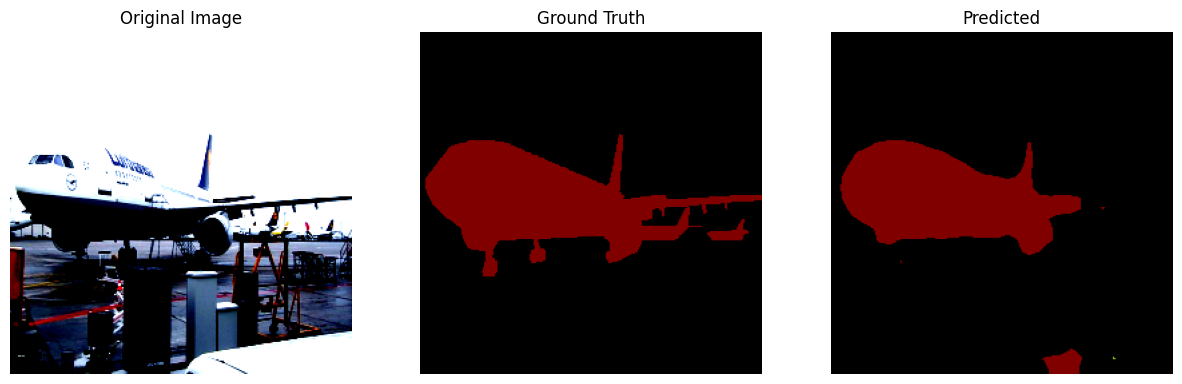

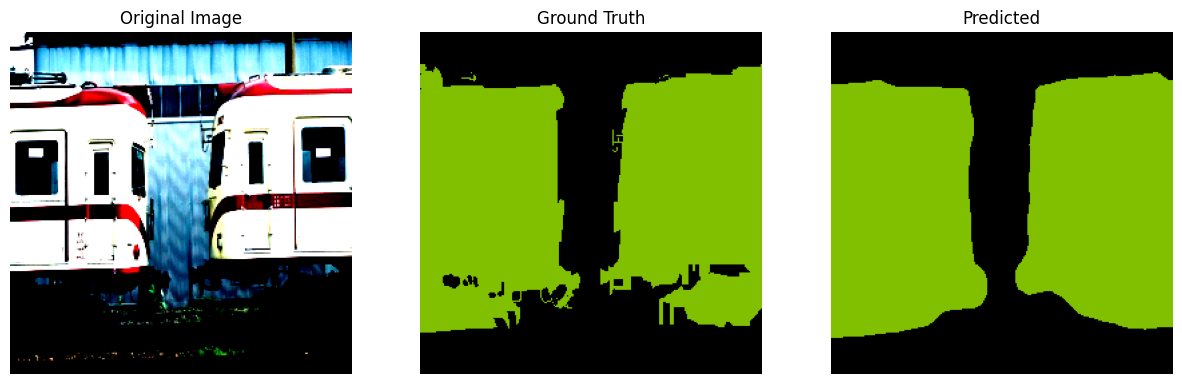

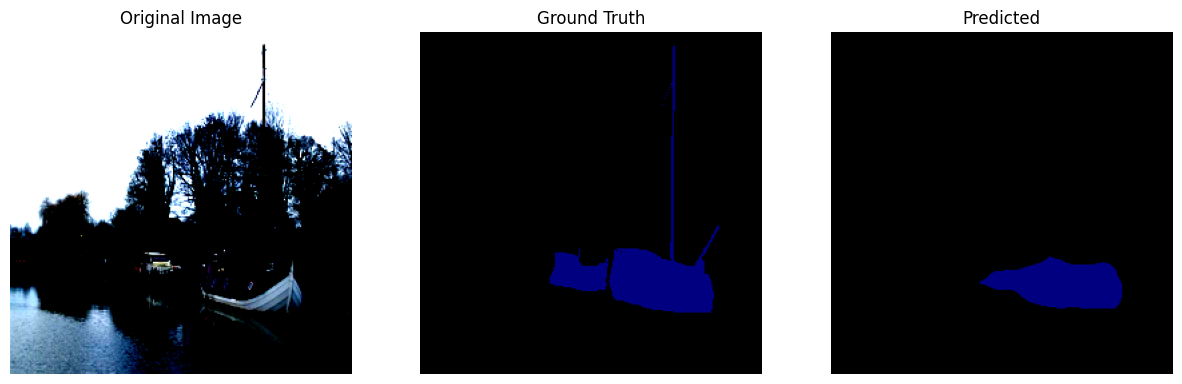

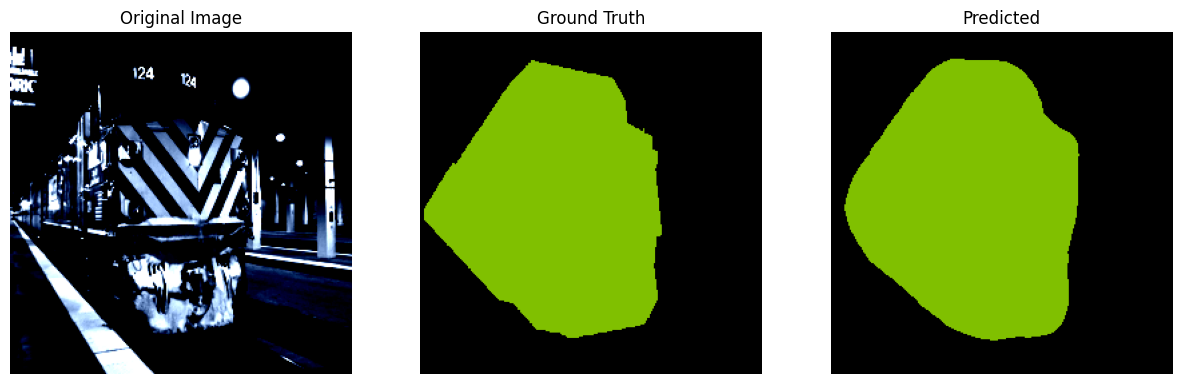

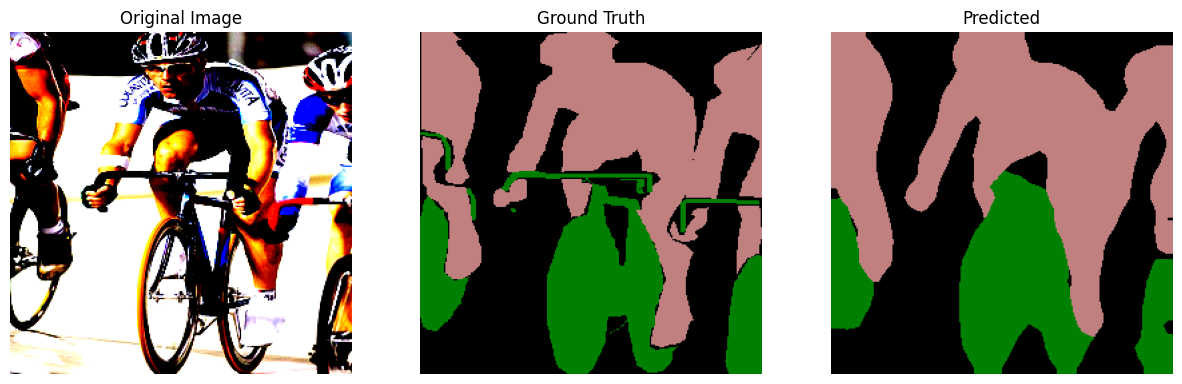

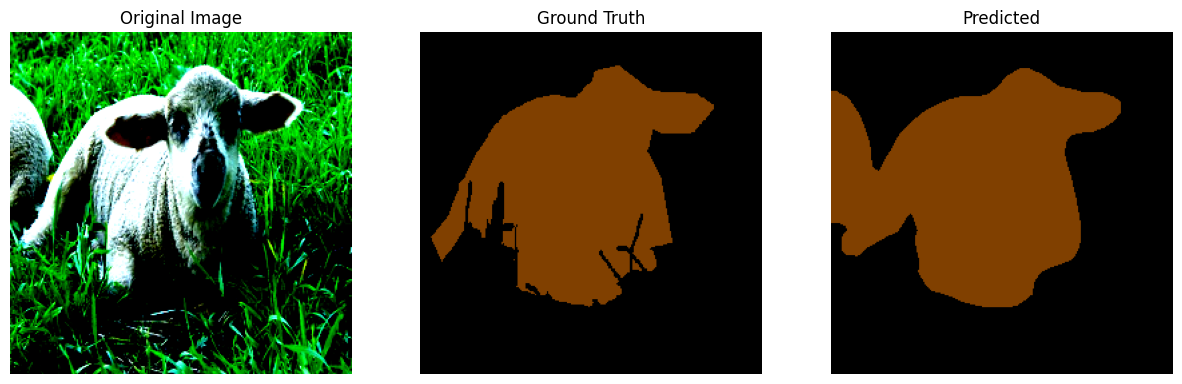

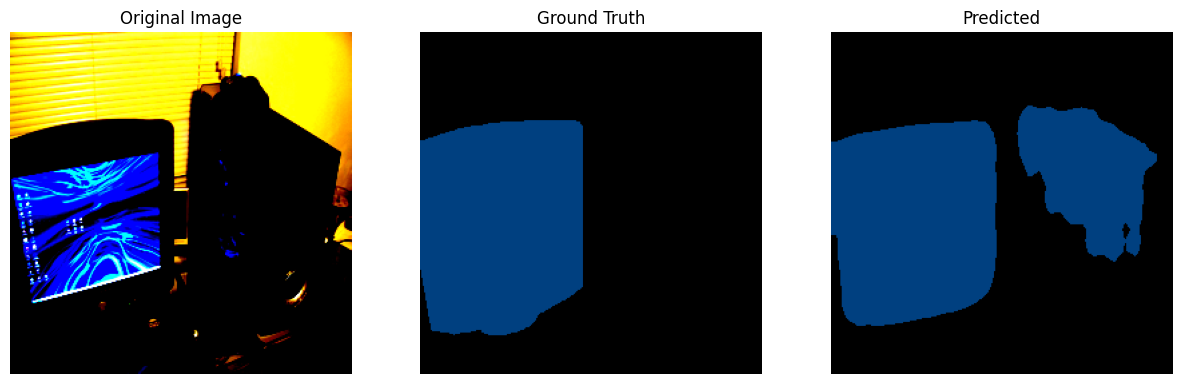

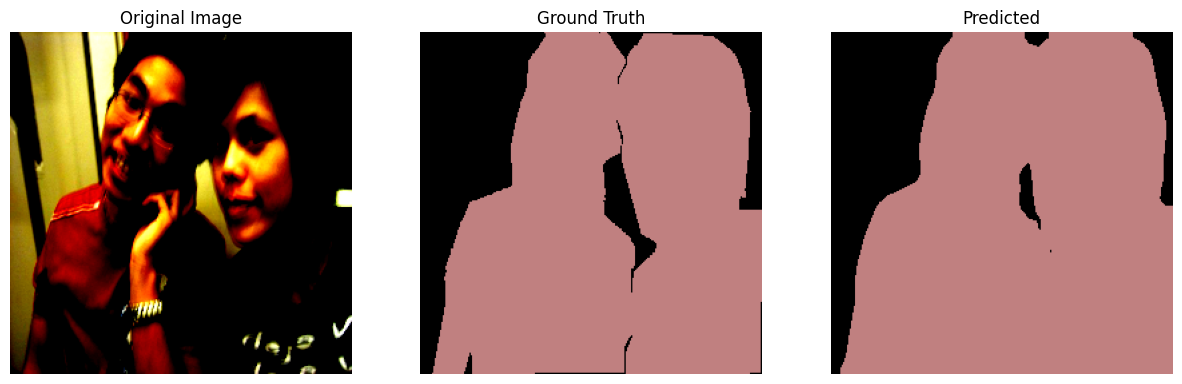

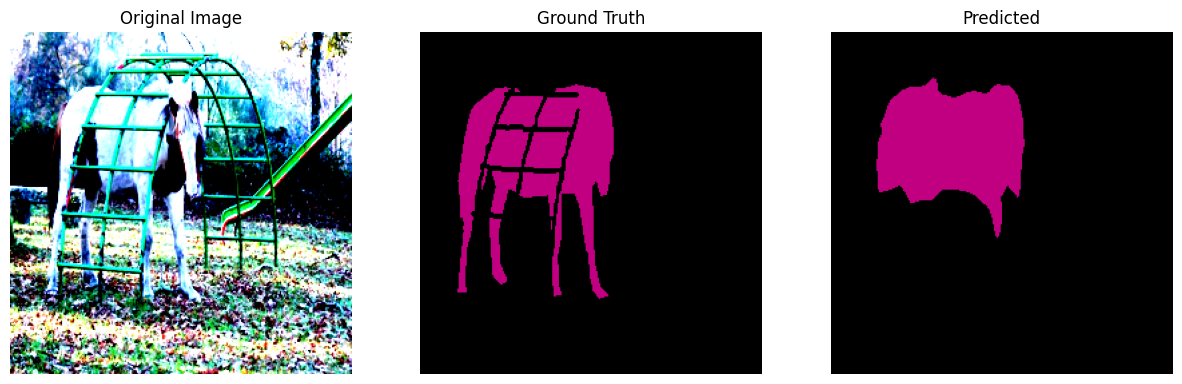

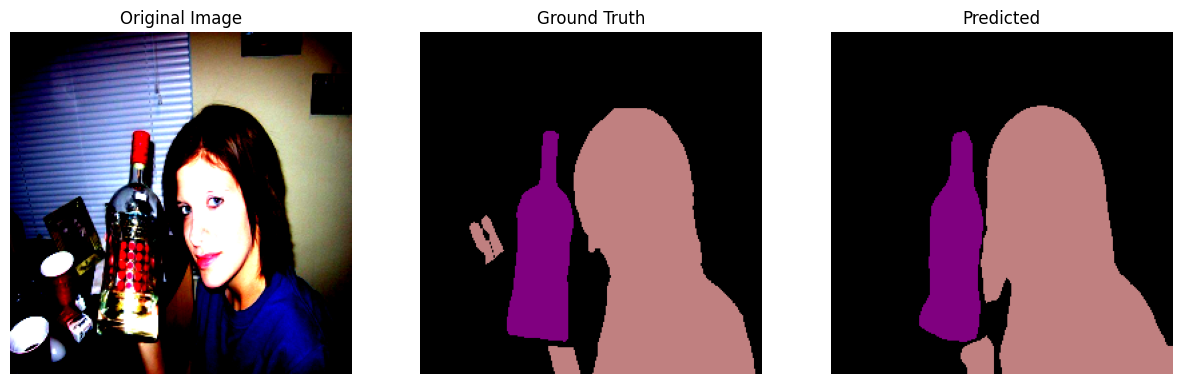

In [58]:
# TODO: Now, provided class to color mapping below, you should visualize the predictions of the model on the validation set.
#       For your convenience, the VOC color map is provided below.
#       You should display 10 images with their original, ground truth, and predicted images side by side. The output should be similar to the example below.


VOC_COLORMAP = [
    [0, 0, 0],
    [128, 0, 0],
    [0, 128, 0],
    [128, 128, 0],
    [0, 0, 128],
    [128, 0, 128],
    [0, 128, 128],
    [128, 128, 128],
    [64, 0, 0],
    [192, 0, 0],
    [64, 128, 0],
    [192, 128, 0],
    [64, 0, 128],
    [192, 0, 128],
    [64, 128, 128],
    [192, 128, 128],
    [0, 64, 0],
    [128, 64, 0],
    [0, 192, 0],
    [128, 192, 0],
    [0, 64, 128],
]

# Convert the predicted tensor to a colorized mask
def decode_segmentation(mask, num_classes=21):
    color_mask = np.full((mask.shape[0], mask.shape[1], 3), 255, dtype=np.uint8)

    for label in range(num_classes):
        color_mask[mask == label] = VOC_COLORMAP[label]
    return color_mask



# 10 pts
def visualize_predictions_with_voc_colors(model, dataloader, num_images, num_classes=21):
    # === TODO ===
    model.eval()  # Set model to evaluation mode

    image_count = 0
    with torch.no_grad():
        for images, targets in dataloader:
            for img, target in zip(images, targets):  # Loop through the batch
                if image_count == num_images:
                    break

                # Move the image and target to the proper device
                img = img.to(DEVICE)
                target = target.to(DEVICE)

                # Get model predictions
                output = model(img.unsqueeze(0))['out']
                pred_mask = torch.argmax(output, dim=1).squeeze(0).cpu().numpy()

                # Convert predictions and ground truth to colorized images
                pred_colored = decode_segmentation(pred_mask, num_classes)
                target_colored = decode_segmentation(target.cpu().numpy(), num_classes)

                # Plot original, ground truth, and predicted images
                fig, ax = plt.subplots(1, 3, figsize=(15, 5))
                ax[0].imshow(img.permute(1, 2, 0).cpu().numpy())
                ax[0].set_title('Original Image')
                ax[0].axis('off')

                ax[1].imshow(target_colored)
                ax[1].set_title('Ground Truth')
                ax[1].axis('off')

                ax[2].imshow(pred_colored)
                ax[2].set_title('Predicted')
                ax[2].axis('off')

                plt.show()
                image_count += 1

            if image_count == num_images:
                break
    # === === ===

visualize_predictions_with_voc_colors(model, val_loader, num_images=10)

### Part 2.3: QA (15 pts)

Read the "Fully Convolutional Networks for Semantic Segmentation" paper (https://arxiv.org/abs/1411.4038) in detail, and answer the following questions:

Q: How does the “skip architecture” improve semantic segmentation results compared to the baseline FCN models?

A: Without the skip architecture, the prediction lacks detail as only the final layer with coarse information is used. The links combine the final prediction layer with lower layers, fusing information from layers with different strides.

---

Q: What are the trade-offs between the “shift-and-stitch” method and in-network upsampling for producing dense predictions?

A:  the output is made denser without decreasing the receptive field sizes
of the filters, but the filters are prohibited from accessing information at a finer scale than their original design.

---

Q: Why does the paper emphasize fine-tuning pre-trained classification networks for semantic segmentation instead of training from scratch?

A: The backbone architectures have already learned useful filters from classification tasks. These are useful for dense prediction tasks as well. Also these are difficult to learn, thus training from scratch is infeasible according to the article.

---

Q: Explain the rationale and implementation of “deconvolution layers” for upsampling in the context of the FCN architecture.

A: The deconvolution layers are backwards convolutions, implemented as reversing the forward and backward passes of convolution. Its primary advantage is that the deconvolution layer does not need to be fixed, it can be learned.

---

Q: How does the combination of in-network upsampling and skip connections balance the inherent trade-off between semantic abstraction and spatial precision in fully convolutional networks?

A: Information from different layers are taken into account when constructing the final segmentation map.

### Part 2.4: Training the FCN (20 pts)

In [ ]:
# TODO: Now, you are going to train the model on the Pascal VOC dataset from scratch, using the same architecture as before.
#    You should set the pretrained weights of the model to False. The rest of the configuration should be the same.
#    You should set the training configuration by experimenting with different hyperparameters.
#    You should set the batch size, learning rate, optimizer, scheduler, and loss function.
#    Note that, you need to use the CrossEntropyLoss for this task, and ignore the index 255 in the loss calculation. Index 255 represents the 'none' class in the dataset.
#    However, DO NOT train the model for more than 20 epochs.
#    Below, we provided the training procedure outputs for a training of 20 epochs.
#    You should plot the training loss and validation mIoU at the end.
#    You should also visualize the predictions of the model on 6 images from the validation set for every epochs, to observe the training progress.
#    After training, you should be able to achieve a validation mIoU of >0.50.

# === TODO ===
epochs = None
batch_size = None
# ...
# === === ===

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=4)



train_losses = []
val_mious = []

for epoch in range(epochs):
    # === TODO ===

    # === === ===


epochs = len(train_losses)
plt.figure(figsize=(12, 5))

# Plot Train Loss
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), train_losses, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.legend()

# Plot Validation mIoU
plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), val_mious, label='Validation mIoU', color='orange')
plt.xlabel('Epoch')
plt.ylabel('mIoU')
plt.title('Validation mIoU')
plt.legend()

plt.tight_layout()
plt.show()

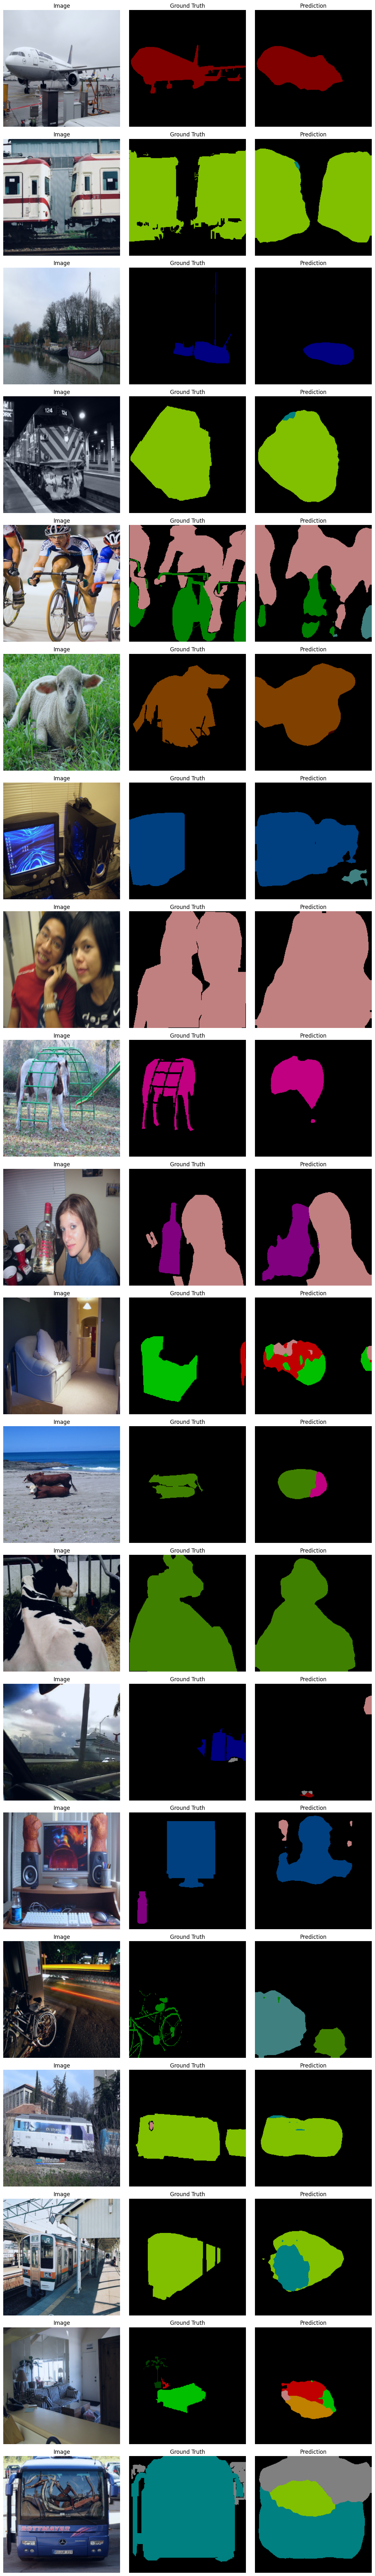

In [ ]:
# Now, display 20 images from the validation set with their original, ground truth, and predicted images side by side, using the trained model.
visualize_predictions_with_voc_colors(model, val_loader, num_images=20)